Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
# import libraries
import nltk
import pandas as pd

In [2]:
text_df = pd.read_csv('yelp.csv')
text_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
text_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
# Create a new column called "text length" which is the number of words in the text column
text_df['text length'] = text_df['text'].apply(len)

In [6]:
text_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


**Exploratory Data Analysis**

In [7]:
# Import the data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

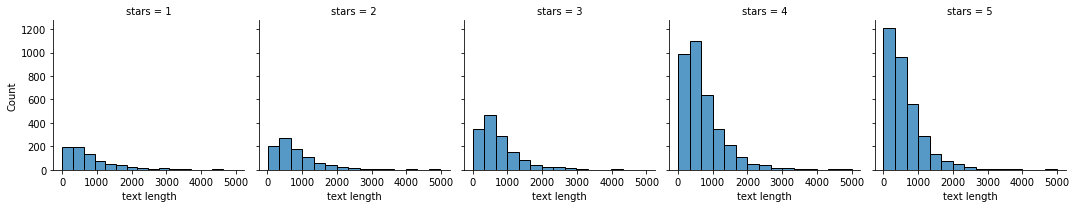

In [19]:
# Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.
g  = sns.FacetGrid(text_df, col='stars')
g.map(sns.histplot, 'text length', bins=15)

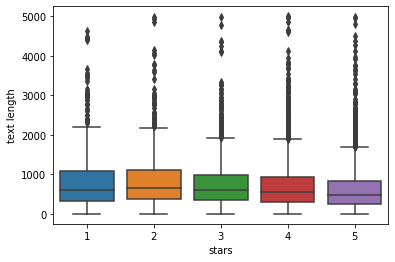

In [23]:
# Create a boxplot of text length for each star category.
sns.boxplot(x='stars',y='text length', data=text_df)

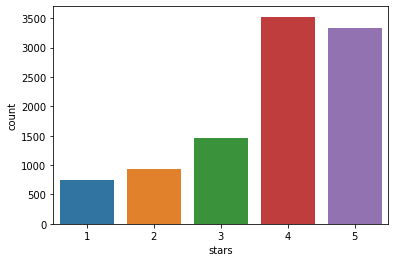

In [24]:
# Create a countplot of the number of occurrences for each type of star rating
sns.countplot(x='stars', data=text_df)

In [28]:
# Use groupby to get the mean values of the numerical columns.
grouped_df = text_df.groupby('stars').mean()
grouped_df

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [30]:
# Use the corr() method on that groupby dataframe
grouped_df.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


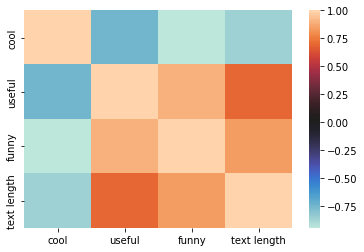

In [43]:
sns.heatmap(grouped_df.corr(), cmap='icefire')

**NLP Classification Task**

In [52]:
# Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.
yelp_class = text_df[text_df['stars'] == 5 ]
yelp_class = yelp_class.append(text_df[text_df['stars'] == 1 ])

In [53]:
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [57]:
# Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (features and target/labels)

X = yelp_class['text']
y = yelp_class['stars']

In [58]:
# Import CountVectorizer and create a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()

In [59]:
# Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.
X = cvec.fit_transform(X)

In [63]:
# Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
#  Import MultinomialNB and create an instance of the estimator and call is nb
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [65]:
# Now fit nb using the training data
nb.fit(X_train, y_train)

MultinomialNB()

In [66]:
# Use the predict method off of nb to predict labels from X_test.
preds = nb.predict(X_test)

In [67]:
# Create a confusion matrix and classification report using these predictions and y_test
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[146  62]
 [ 30 988]]
              precision    recall  f1-score   support

           1       0.83      0.70      0.76       208
           5       0.94      0.97      0.96      1018

    accuracy                           0.92      1226
   macro avg       0.89      0.84      0.86      1226
weighted avg       0.92      0.92      0.92      1226



In [68]:
# Import TfidfTransformer from sklearn.
from sklearn.feature_extraction.text import TfidfTransformer

In [71]:
# Import Pipeline from sklearn.
from sklearn.pipeline import Pipeline

In [72]:
# Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()
pipeline = Pipeline([
                     ('vectorizer', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('nb', MultinomialNB())
])

In [73]:
# Redo the train test split on the yelp_class object.
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
# Now fit the pipeline to the training data.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('nb', MultinomialNB())])

In [75]:
# Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.
pipeline.score(X_test, y_test)

0.8235730170496665

In [77]:
# Looks like Tf-Idf actually made things worse!
pipe_preds = pipeline.predict(X_test)
print(confusion_matrix(y_test, pipe_preds))
print(classification_report(y_test, pipe_preds))

[[   1  238]
 [   0 1110]]
              precision    recall  f1-score   support

           1       1.00      0.00      0.01       239
           5       0.82      1.00      0.90      1110

    accuracy                           0.82      1349
   macro avg       0.91      0.50      0.46      1349
weighted avg       0.85      0.82      0.74      1349

